# Topic: Use breast cancer dataset to classify whether the tumor is benign or malignant.

1. This is a classification task that falls under supervised learning. I will attempt to analyze it using various methods and models such as logistic regression, decision tree, random forest, gradient boosting, and SVM (support vector machine).

2. This will benefit doctors in the field of breast cancer research. If we can train a model, we will advance the development of breast cancer research and significantly improve doctors' work efficiency. That is the reason why I choose this topic.




# Data Source and Explanation.

1. This breast cancer databases was obtained from the University of Wisconsin Hospitals, Madison from Dr. William H. Wolberg.

2. Samples arrive periodically as Dr. Wolberg reports his clinical cases. The database therefore reflects this chronological grouping of the data.

3. This grouping information appears immediately below, having been removed from the data itself:

   Group 1: 367 instances (January 1989)

   Group 2:  70 instances (October 1989)

   Group 3:  31 instances (February 1990)

   Group 4:  17 instances (April 1990)

   Group 5:  48 instances (August 1990)

   Group 6:  49 instances (Updated January 1991)

   Group 7:  31 instances (June 1991)

   Group 8:  86 instances (November 1991)

   Total:   699 points (as of the donated datbase on 15 July 1992)

4. The dataset was downloaded at https://archive.ics.uci.edu/dataset/15/breast+cancer+wisconsin+original.

5. This dataset has 699 instance and 9 features(except Sample Code Number and Class). There is some data missing.

# Citations/Acknowledgements

This breast cancer databases was obtained from the University of Wisconsin Hospitals, Madison from Dr. William H. Wolberg. 
1. O. L. Mangasarian and W. H. Wolberg: "Cancer diagnosis via linear programming", SIAM News, Volume 23, Number 5, September 1990, pp 1 & 18.
2. William H. Wolberg and O.L. Mangasarian: "Multisurface method of pattern separation for medical diagnosis applied to breast cytology", Proceedings of the National Academy of Sciences, U.S.A., Volume 87, December 1990, pp 9193-9196.
3. O. L. Mangasarian, R. Setiono, and W.H. Wolberg: "Pattern recognition via linear programming: Theory and application to medical diagnosis", in: "Large-scale numerical optimization", Thomas F. Coleman and Yuying Li, editors, SIAM Publications, Philadelphia 1990, pp 22-30.
4. K. P. Bennett & O. L. Mangasarian: "Robust linear programming discrimination of two linearly inseparable sets", Optimization Methods and Software 1, 1992, 23-34 (Gordon & Breach Science Publishers).

First, Let's import all the libraries we need.

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

Let's load the breast-cancer-wisconsin.data dataset into bc_wisconsin_df

And we use the head() funtion to show what the dataset looks like.

In [45]:
# Define file paths for the datasets
file_path_bc_wisconsin = f'./breast_cancer/breast-cancer-wisconsin.data'

# Load datasets into DataFrames
column_names_bc_wisconsin = [
    'Sample code number', 'Clump Thickness', 'Uniformity of Cell Size',
    'Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size',
    'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses', 'Class'
]

# Load the breast-cancer-wisconsin.data dataset
bc_wisconsin_df = pd.read_csv(
    file_path_bc_wisconsin,
    header=None,
    names=column_names_bc_wisconsin,
    na_values='?'
)

# Display the head of the dataset to confirm it loaded correctly
bc_wisconsin_df.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2


In [46]:
bc_wisconsin_df.describe()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,683.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,3.643857,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [47]:
bc_wisconsin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Sample code number           699 non-null    int64  
 1   Clump Thickness              699 non-null    int64  
 2   Uniformity of Cell Size      699 non-null    int64  
 3   Uniformity of Cell Shape     699 non-null    int64  
 4   Marginal Adhesion            699 non-null    int64  
 5   Single Epithelial Cell Size  699 non-null    int64  
 6   Bare Nuclei                  683 non-null    float64
 7   Bland Chromatin              699 non-null    int64  
 8   Normal Nucleoli              699 non-null    int64  
 9   Mitoses                      699 non-null    int64  
 10  Class                        699 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 60.2 KB


We see that this dataset has 699 rows and 11 columns(include 9 features, Sample Code Number and Class). There may be some data missing.

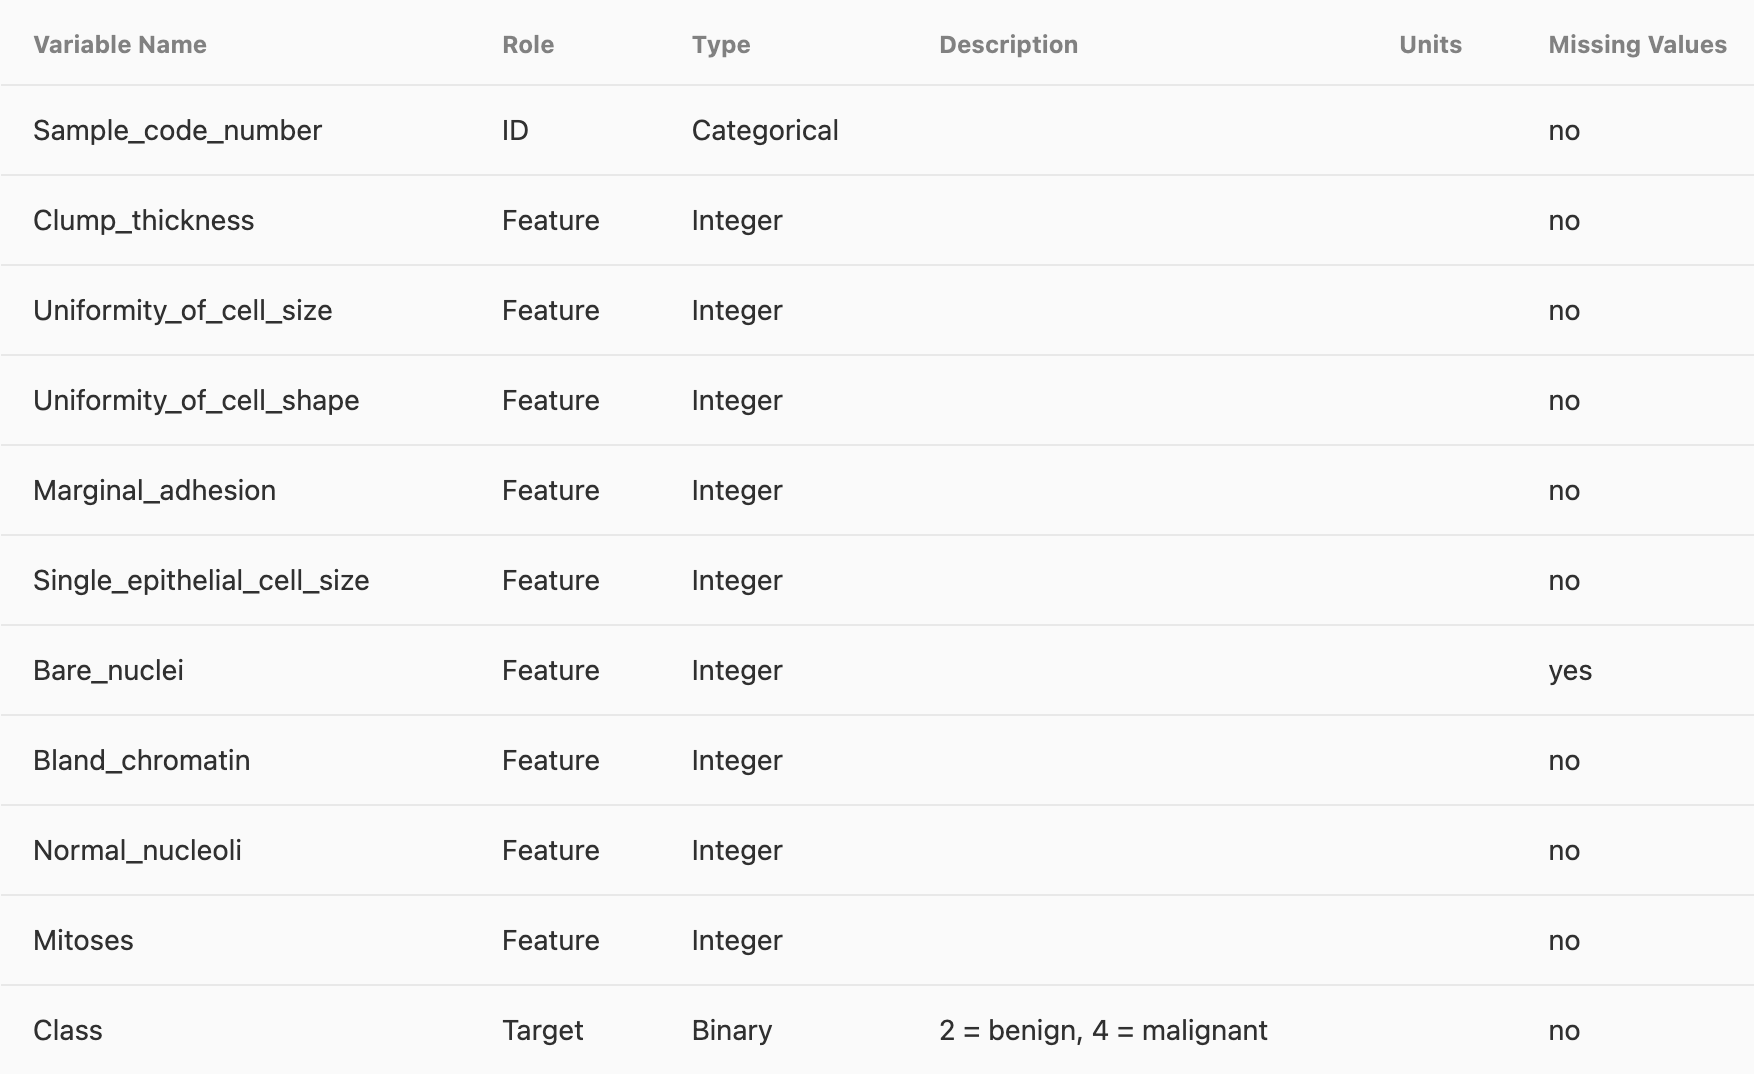

From the all above, we can see this breast cancer dataset contains multiple features describing the characteristics of cell samples, which can help differentiate between benign and malignant cases. Each data point represents a cell sample and includes features such as Clump Thickness, Uniformity of Cell Size, Uniformity of Cell Shape, Marginal Adhesion, Bare Nuclei, and Mitoses. The goal is to predict whether a sample is benign (non-cancerous) or malignant (cancerous) based on these features.

# Data Cleaning

1. First we have to drop rows with non-numeric values and fill missing values if necessary.

2. Second we have to move the sample code number column and the class column.

3. Convert Class column to binary (0 for benign, 1 for malignant)

4. Plot histograms for each feature.

5. Create box plots for each feature to identify outliers

6. Scatter plot matrix to show relationships between features

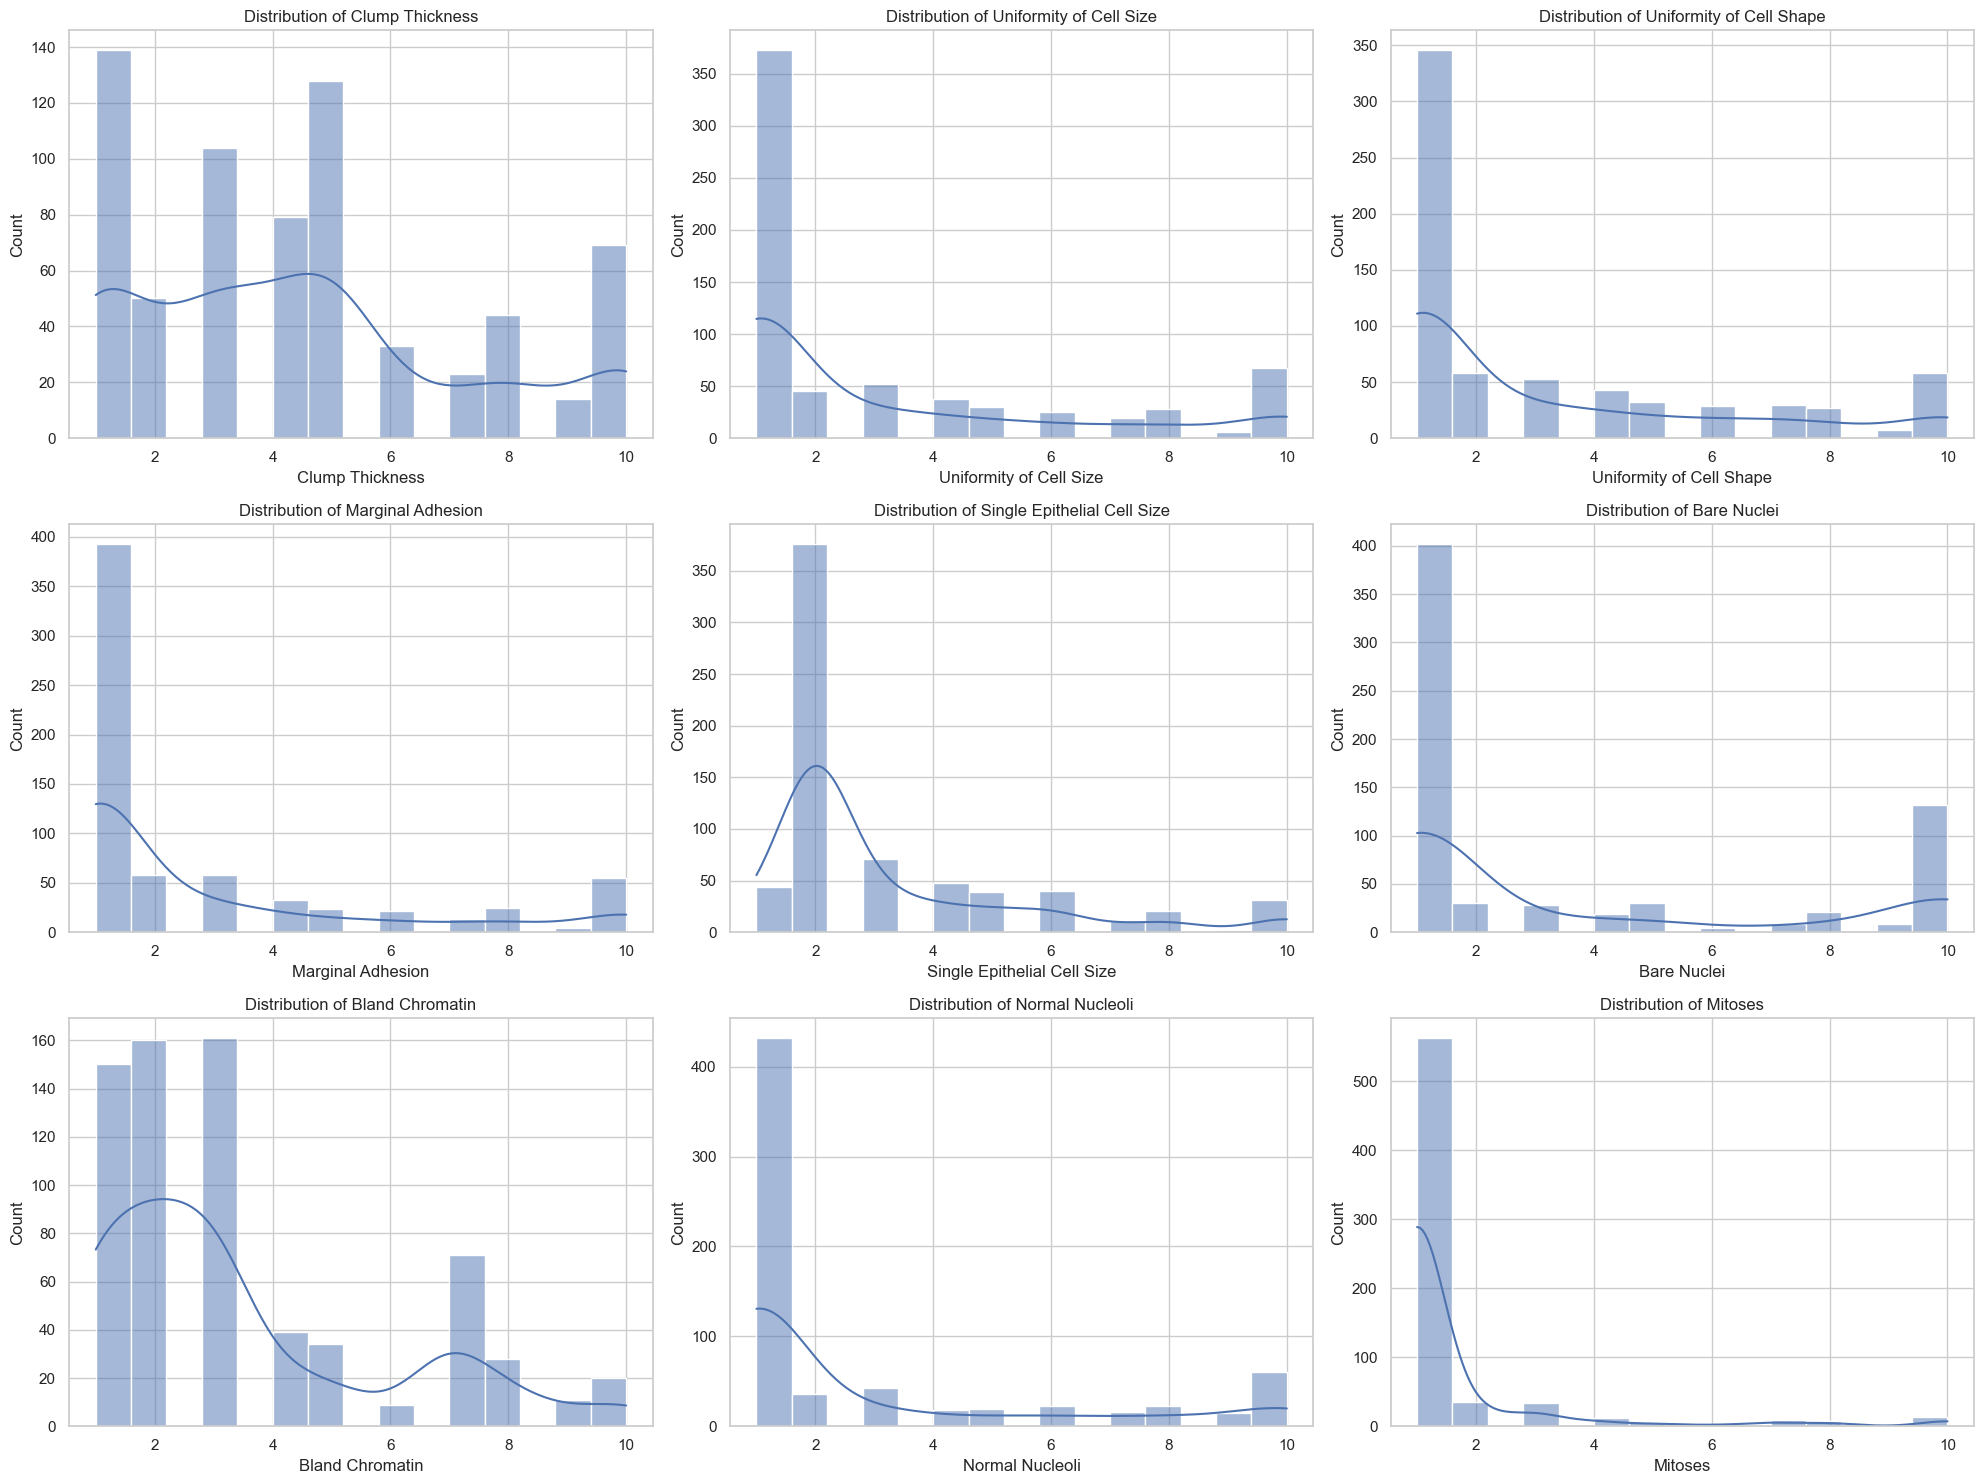

In [48]:
# Drop rows with non-numeric values and fill missing values if necessary
bc_wisconsin_df = bc_wisconsin_df.apply(pd.to_numeric, errors='coerce')
bc_wisconsin_df.dropna(inplace=True)

# Convert Class column to binary (0 for benign, 1 for malignant)
bc_wisconsin_df['Class'] = bc_wisconsin_df['Class'].map({2: 0, 4: 1})

# Set up the visual style for plots
sns.set(style="whitegrid")

# Plotting histograms for each feature
features = [
    'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape',
    'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei',
    'Bland Chromatin', 'Normal Nucleoli', 'Mitoses'
]

# Create histograms for each feature
plt.figure(figsize=(20, 15))
for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(bc_wisconsin_df[feature], kde=True, bins=15)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)

plt.tight_layout()
plt.show()


From the chart above we can tell that there is no obvious outlier in the dataset. So it's not necessary to damp the outlier.

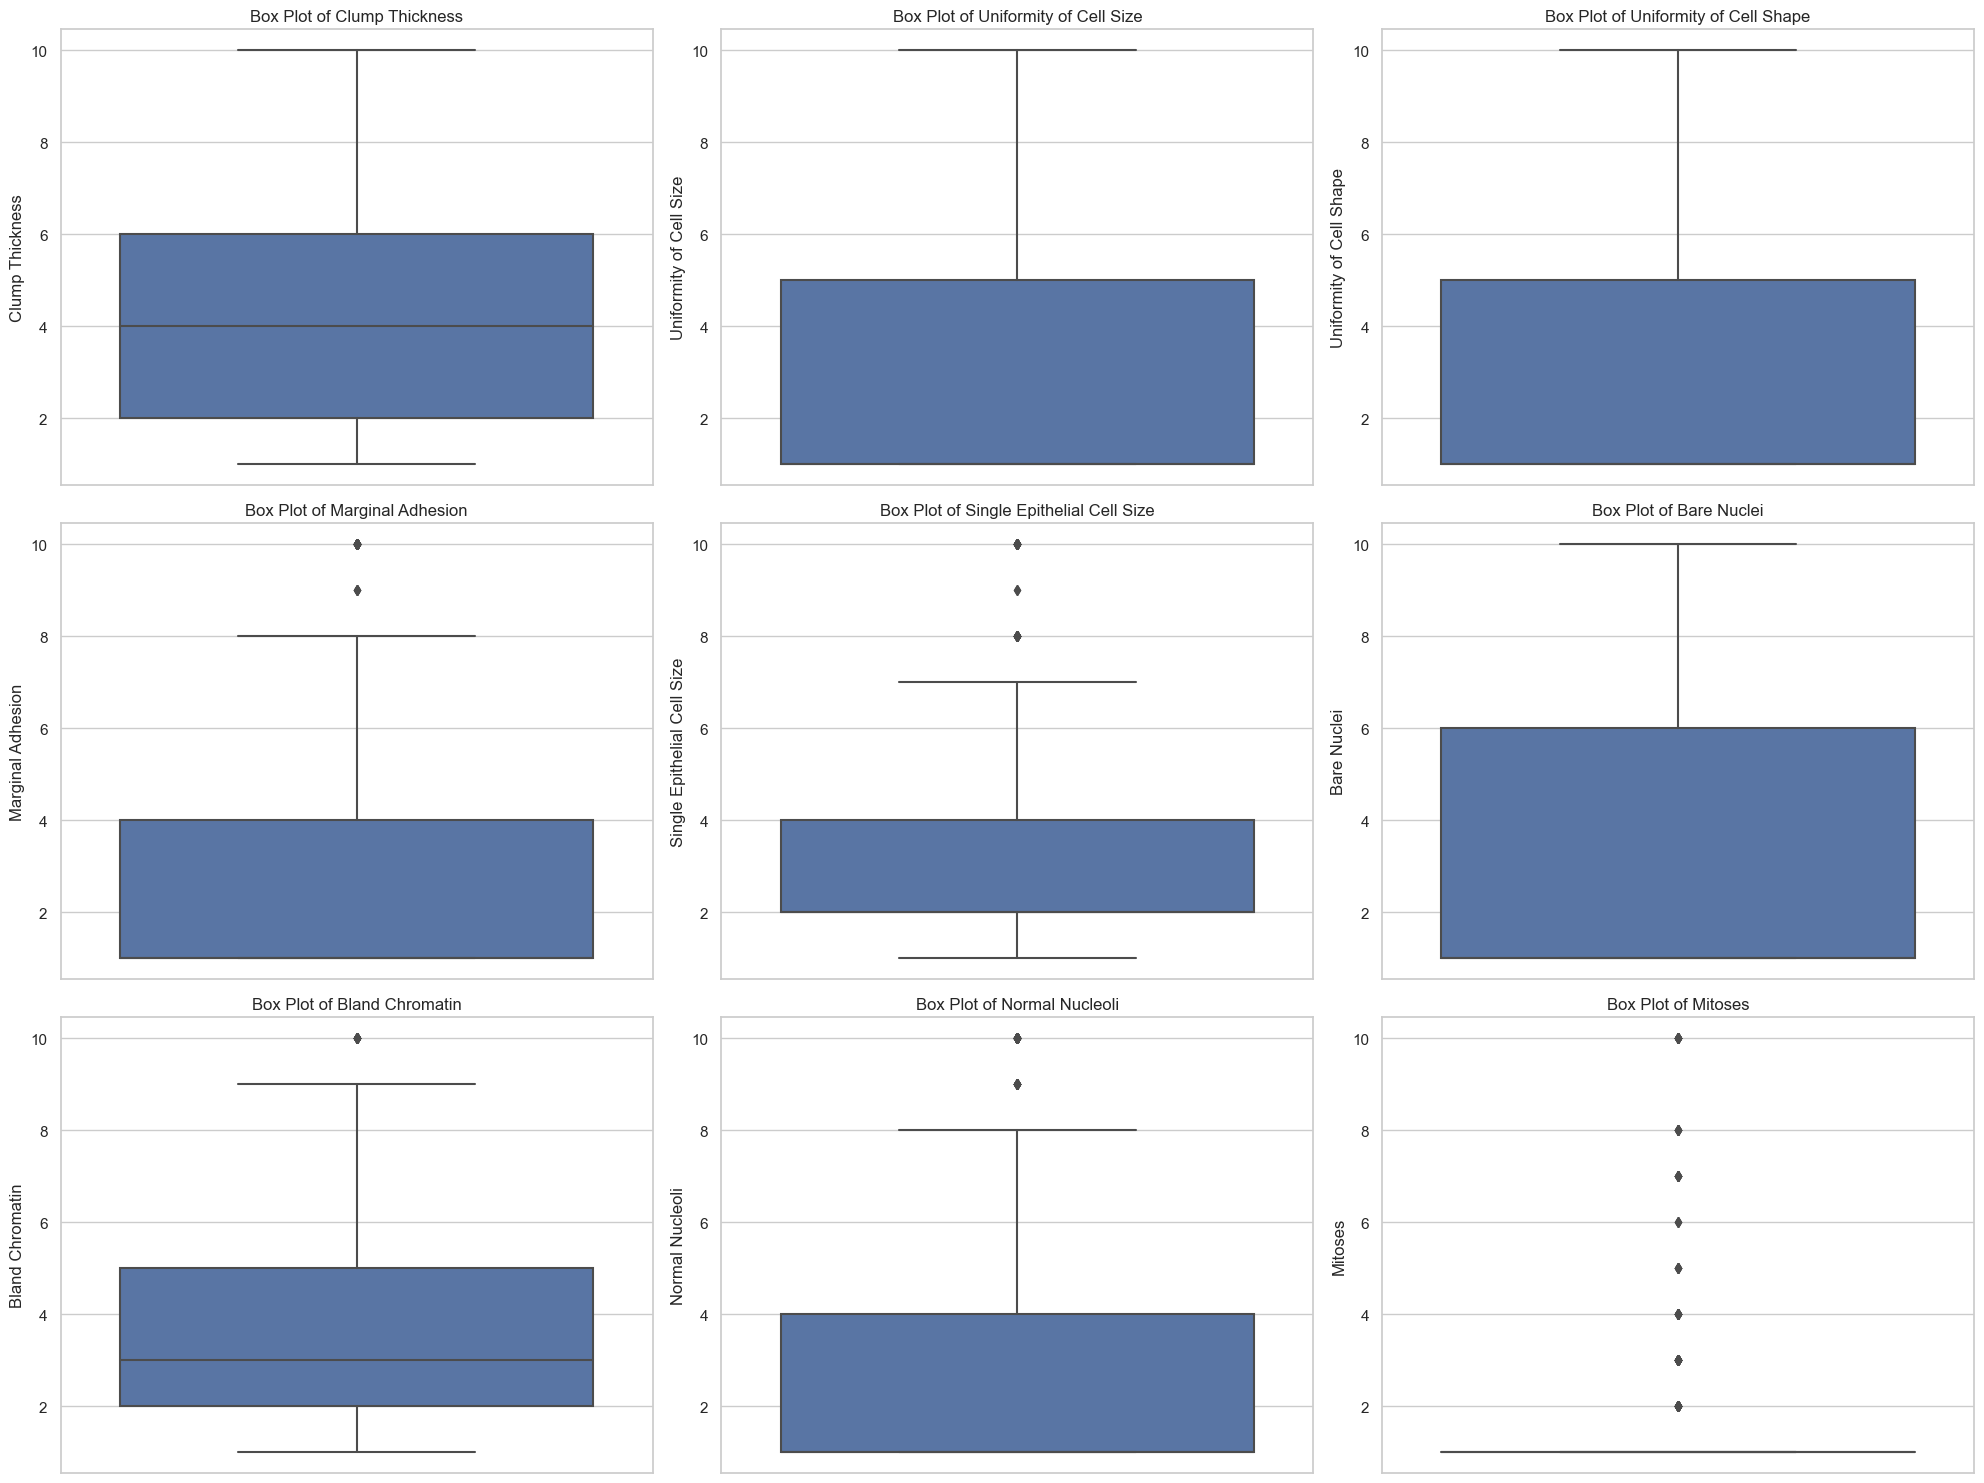

In [49]:
# Create box plots for each feature to identify outliers
plt.figure(figsize=(20, 15))
for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=bc_wisconsin_df[feature])
    plt.title(f'Box Plot of {feature}')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

/Users/songruiming/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


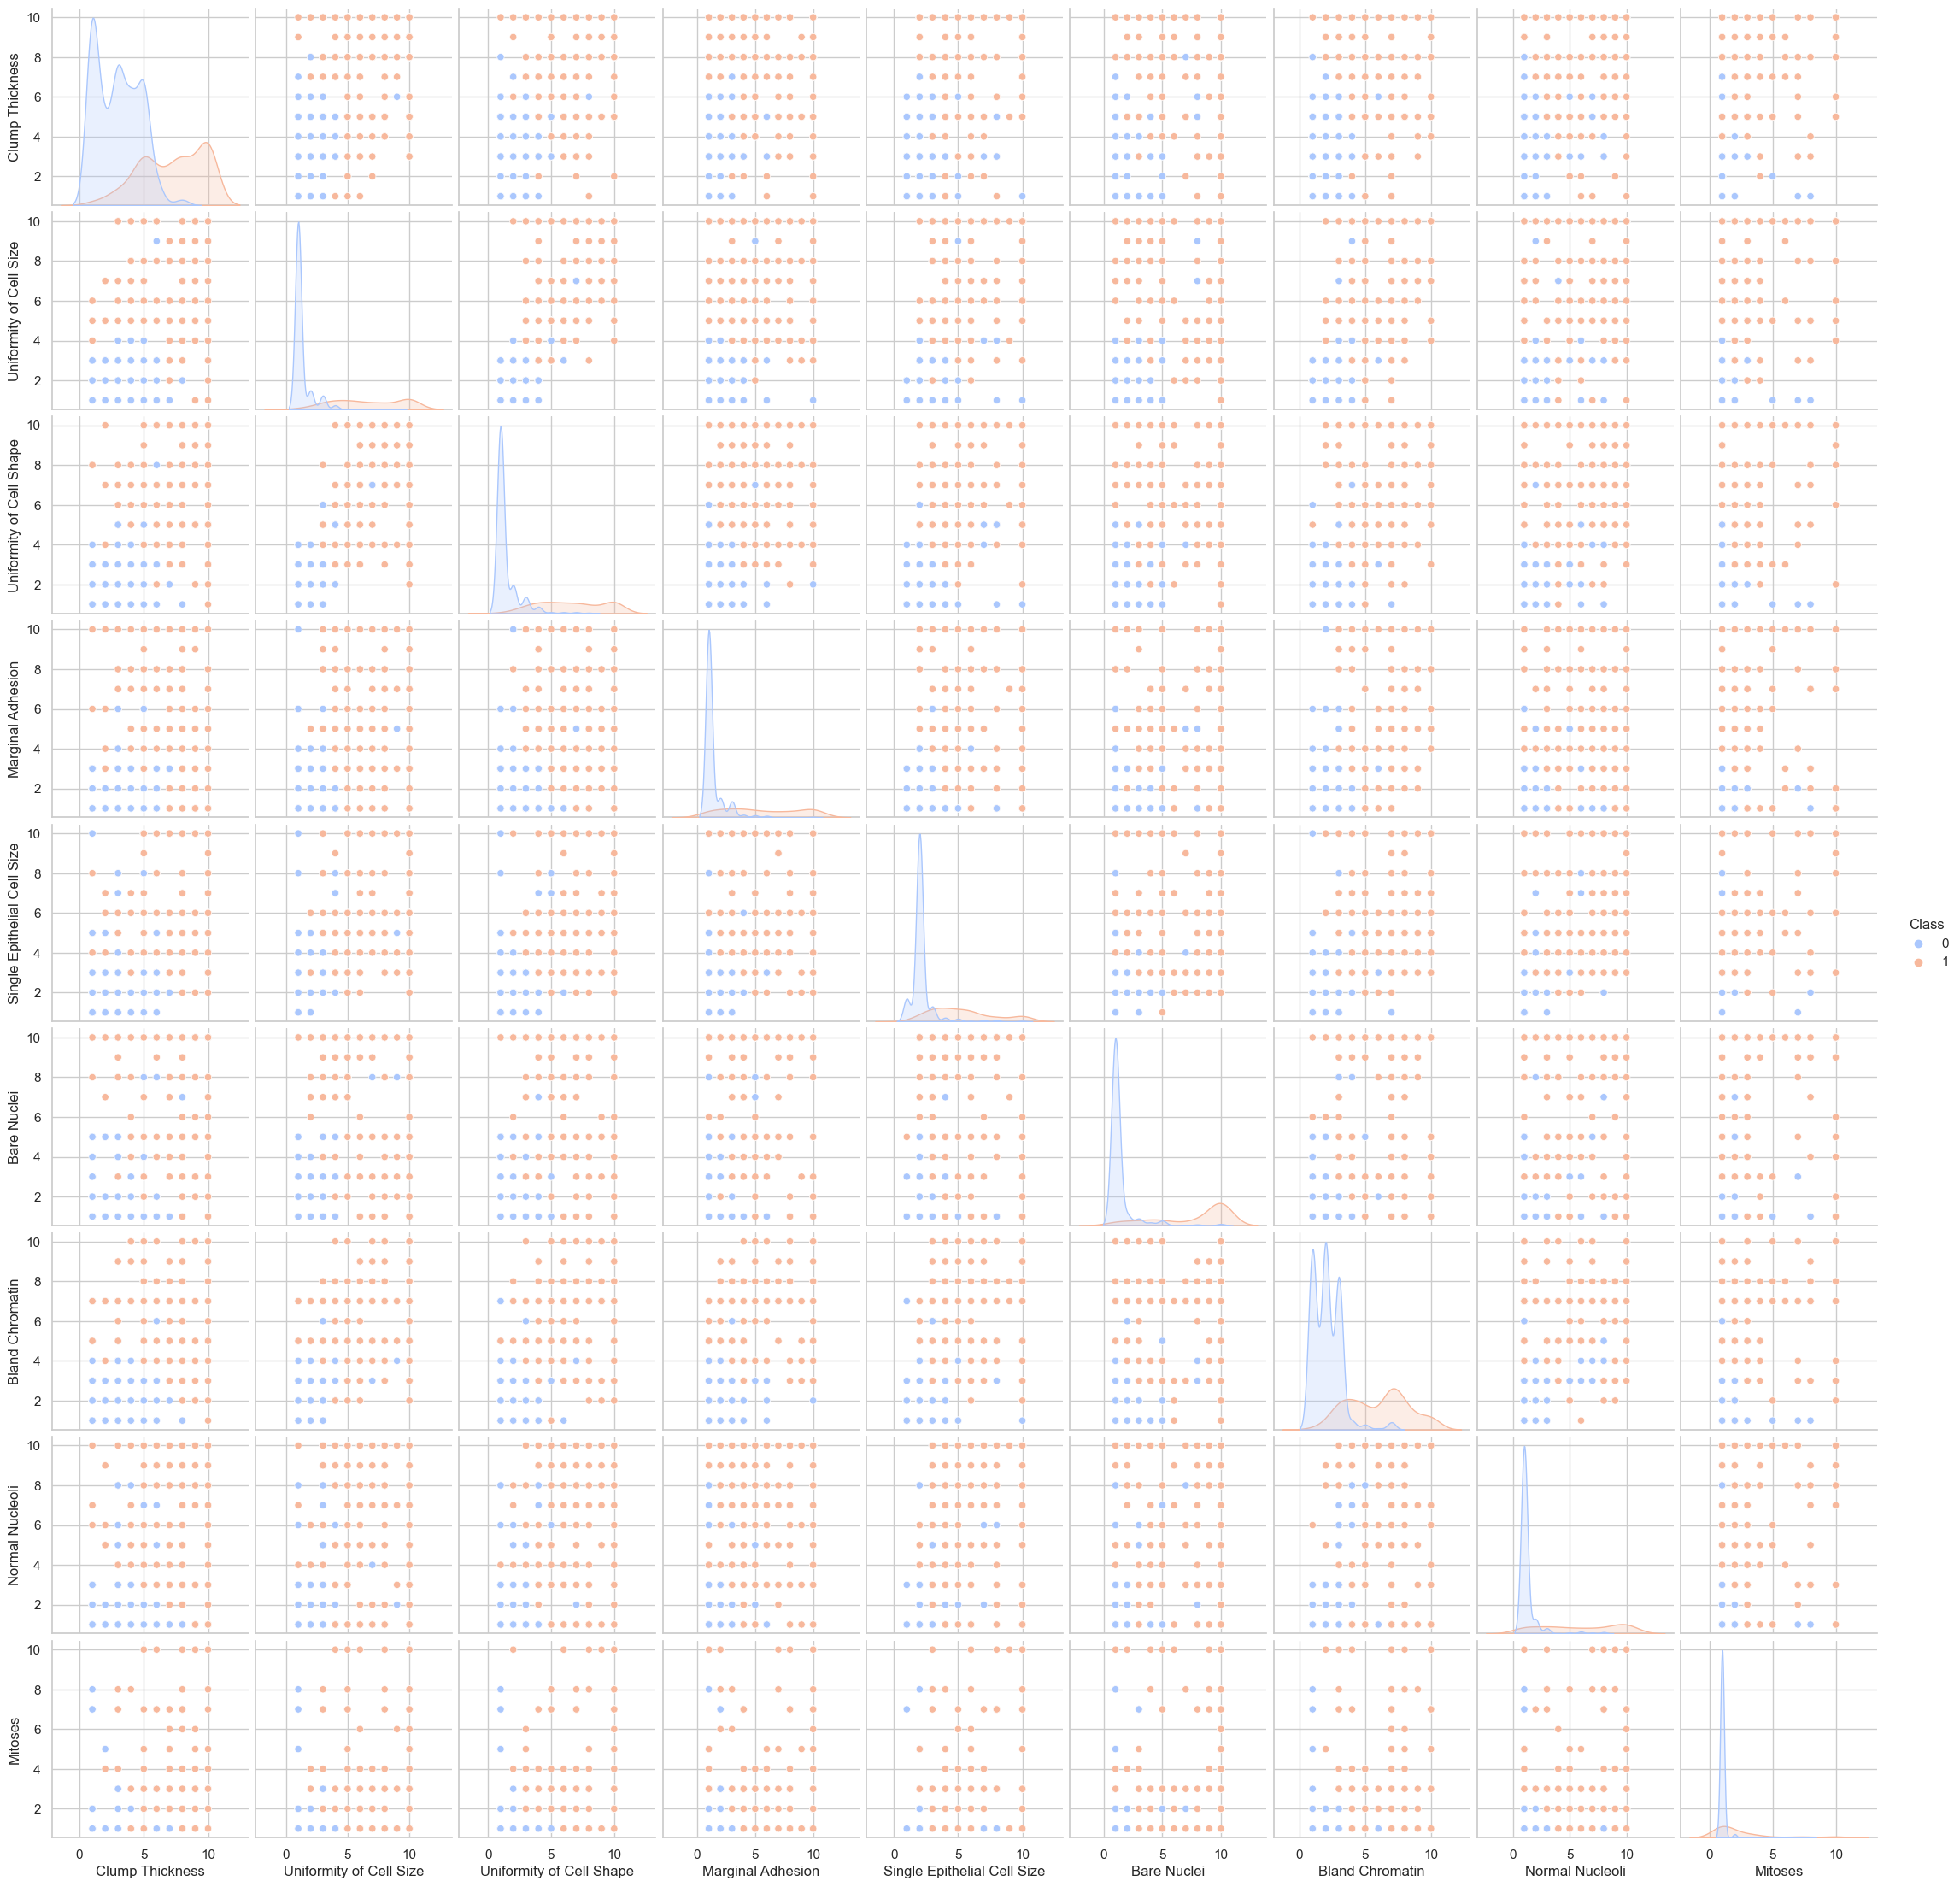

In [50]:
# Scatter plot matrix to show relationships between features
sns.pairplot(bc_wisconsin_df[features + ['Class']], hue='Class', palette='coolwarm')
plt.show()

Let's draw the correlation matrix using a heatmap.

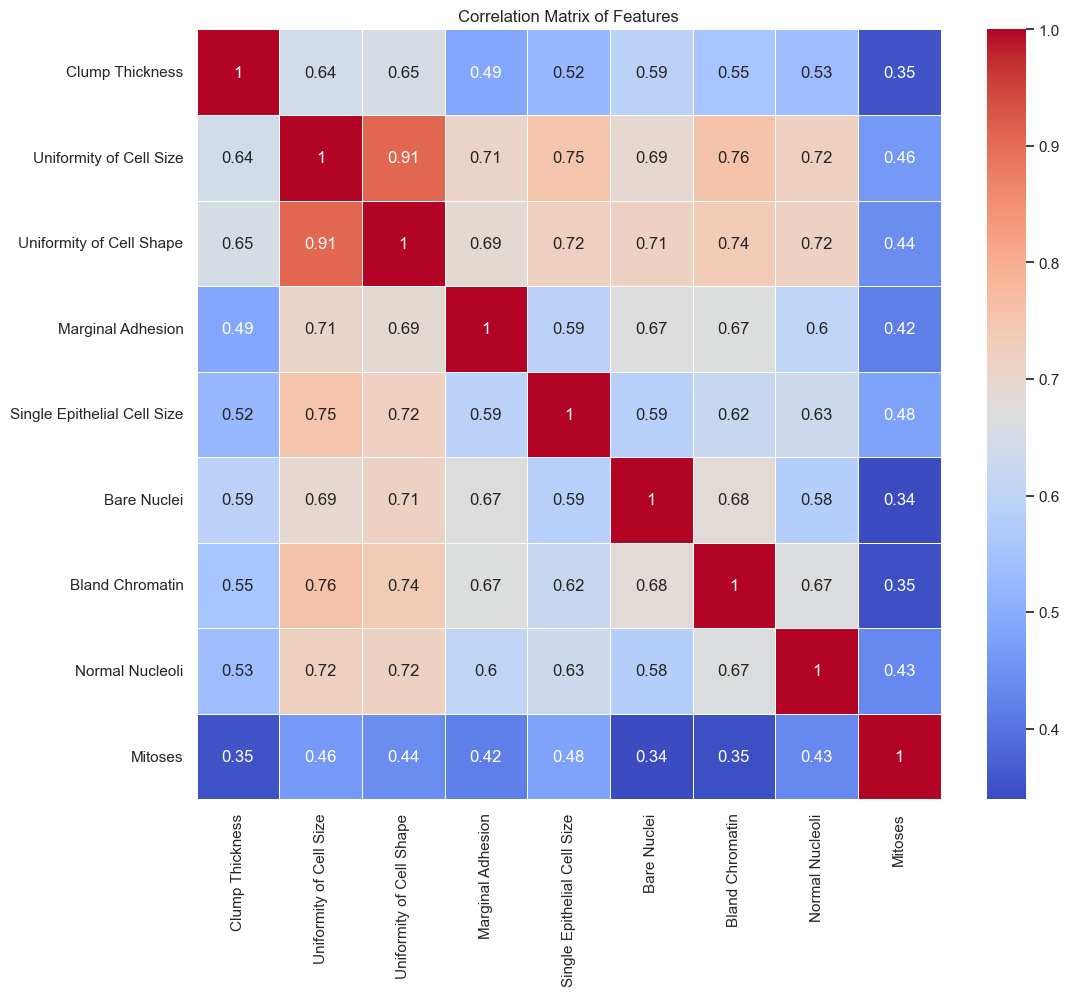

In [51]:
# Correlation analysis
correlation_matrix = bc_wisconsin_df[features].corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()

# Summary of correlations and their significance
1. Correlation analysis shows the relationships between various factors in the dataset.
2. High correlation between 'Uniformity of Cell Size' and 'Uniformity of Cell Shape' suggests that when one is higher, the other tends to be higher as well, which makes sense given their related nature in describing cell morphology. 
3. Low correlation between 'Mitoses' and most other features indicates it may contribute independently to the diagnosis.
Features with high positive correlations may suggest redundancy, while low or negative correlations could highlight unique contributions to cancer diagnosis.

I decided to drop 'Uniformity of Cell Shape'.

In [52]:
# Prepare features and labels, dropping highly correlated 'Uniformity of Cell Shape'
X = bc_wisconsin_df.drop(['Sample code number', 'Class', 'Uniformity of Cell Shape'], axis=1)
y = bc_wisconsin_df['Class']
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Logistic Regression

In [53]:
# Initialize and train the logistic regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Make predictions
y_pred = logreg.predict(X_test)

# Print evaluation metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[125   2]
 [  7  71]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       127
           1       0.97      0.91      0.94        78

    accuracy                           0.96       205
   macro avg       0.96      0.95      0.95       205
weighted avg       0.96      0.96      0.96       205


Accuracy Score:
0.9560975609756097


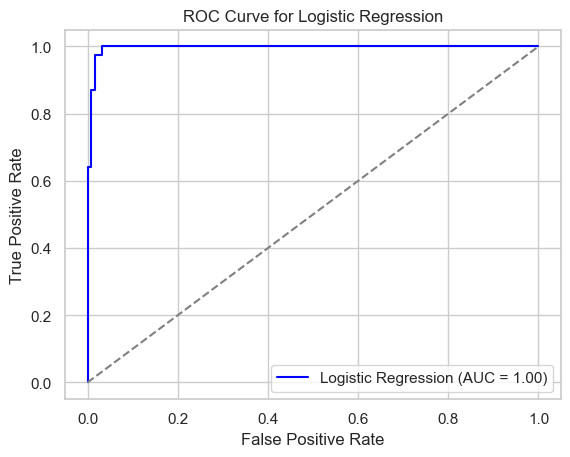

In [54]:
# Plot ROC curve for logistic regression
fpr, tpr, _ = roc_curve(y_test, logreg.predict_proba(X_test)[:, 1])
plt.figure()
plt.plot(fpr, tpr, color='blue', label='Logistic Regression (AUC = {:.2f})'.format(auc(fpr, tpr)))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend()
plt.show()

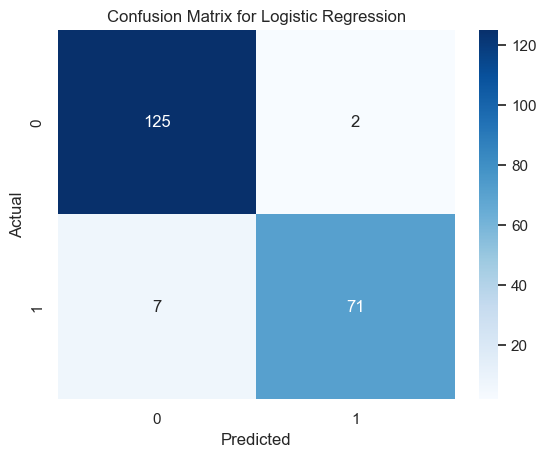

In [55]:
# Plot confusion matrix for logistic regression
plt.figure()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Decision Tree

In [56]:
# Initialize and train the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Make predictions using the Decision Tree model
y_pred_dt = dt_classifier.predict(X_test)

# Print evaluation metrics for Decision Tree
print("\nDecision Tree Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))
print("\nDecision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))
print("\nDecision Tree Accuracy Score:")
print(accuracy_score(y_test, y_pred_dt))


Decision Tree Confusion Matrix:
[[124   3]
 [  8  70]]

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       127
           1       0.96      0.90      0.93        78

    accuracy                           0.95       205
   macro avg       0.95      0.94      0.94       205
weighted avg       0.95      0.95      0.95       205


Decision Tree Accuracy Score:
0.9463414634146341


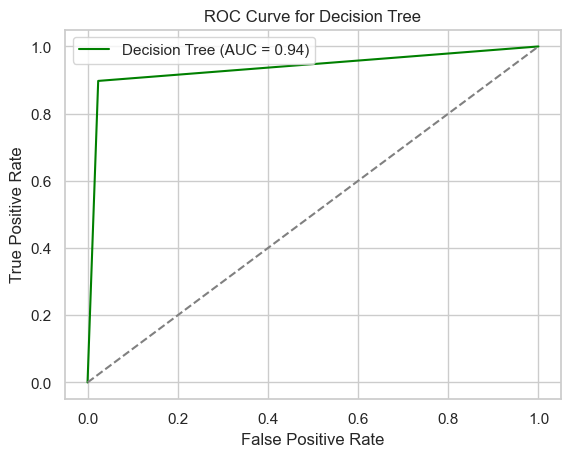

In [57]:
# Plot ROC curve for Decision Tree
dt_probs = dt_classifier.predict_proba(X_test)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_probs)
plt.figure()
plt.plot(fpr_dt, tpr_dt, color='green', label='Decision Tree (AUC = {:.2f})'.format(auc(fpr_dt, tpr_dt)))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree')
plt.legend()
plt.show()

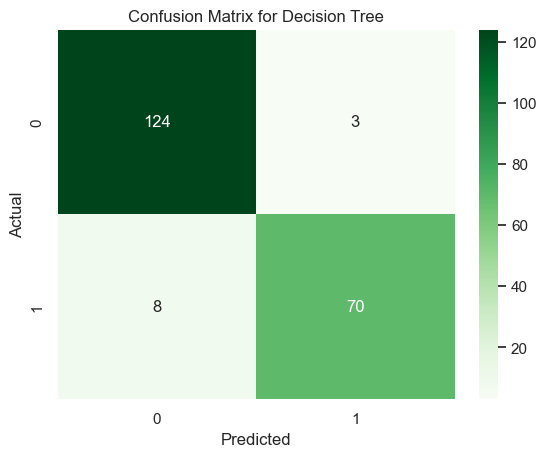

In [58]:
# Plot confusion matrix for Decision Tree
plt.figure()
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix for Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

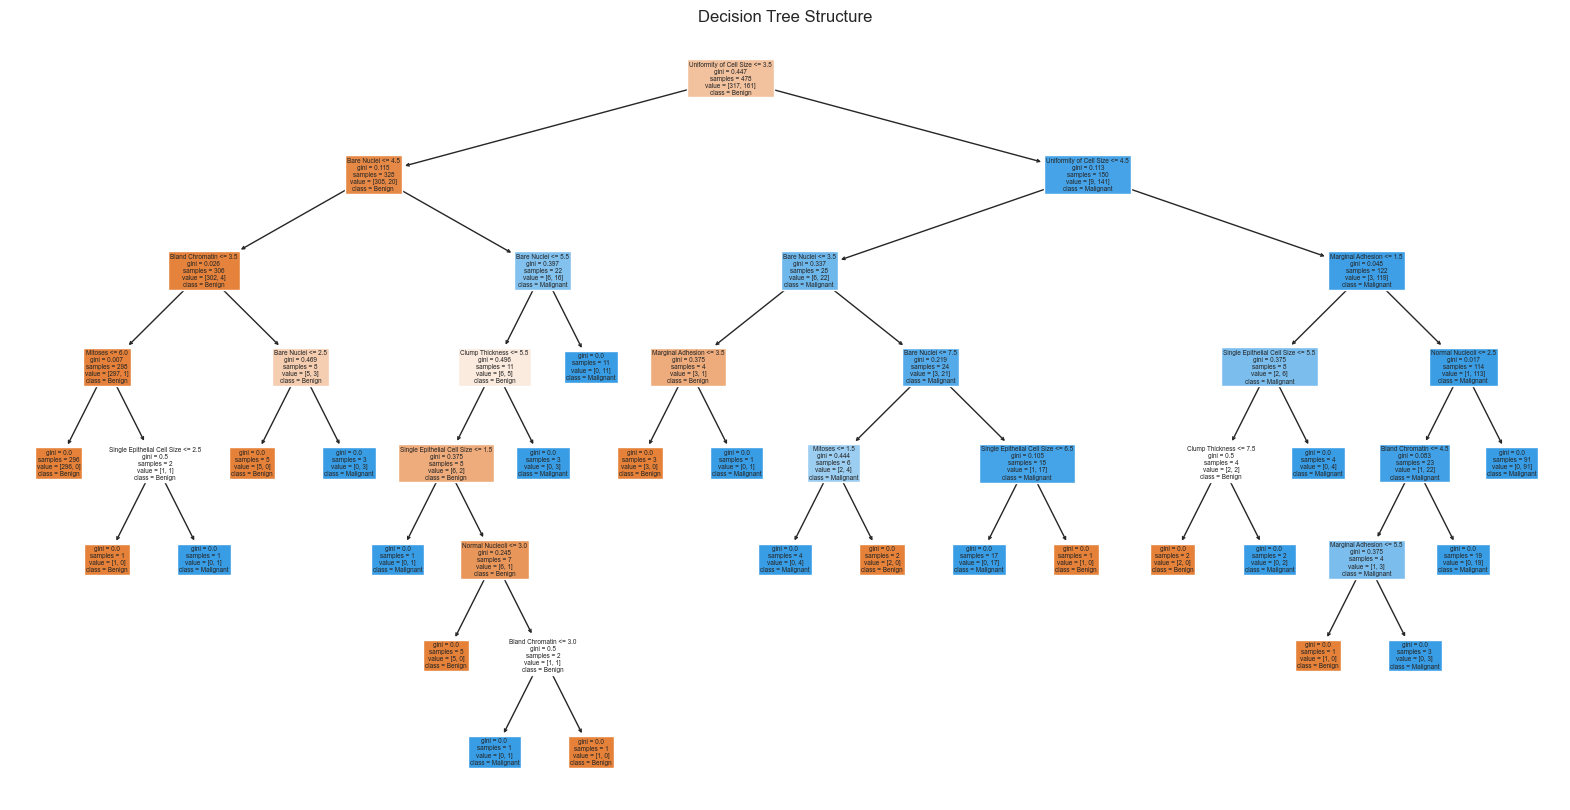

In [59]:
# Plot the Decision Tree structure
plt.figure(figsize=(20, 10))
plot_tree(dt_classifier, feature_names=list(X.columns), class_names=['Benign', 'Malignant'], filled=True)
plt.title('Decision Tree Structure')
plt.show()

# Random forest

In [60]:
# Initialize and train the random forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions using the random forest model
y_pred_rf = rf_classifier.predict(X_test)

# Print evaluation metrics for random forest
print("\nRandom Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("\nRandom Forest Accuracy Score:")
print(accuracy_score(y_test, y_pred_rf))



Random Forest Confusion Matrix:
[[125   2]
 [  6  72]]

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       127
           1       0.97      0.92      0.95        78

    accuracy                           0.96       205
   macro avg       0.96      0.95      0.96       205
weighted avg       0.96      0.96      0.96       205


Random Forest Accuracy Score:
0.9609756097560975


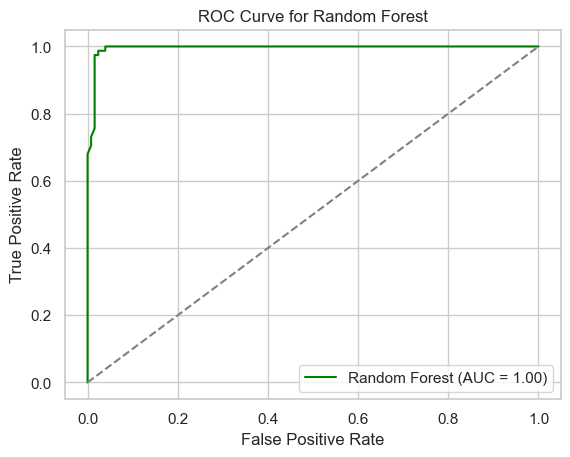

In [61]:
# Plot ROC curve for random forest
rf_probs = rf_classifier.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)
plt.figure()
plt.plot(fpr_rf, tpr_rf, color='green', label='Random Forest (AUC = {:.2f})'.format(auc(fpr_rf, tpr_rf)))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.legend()
plt.show()

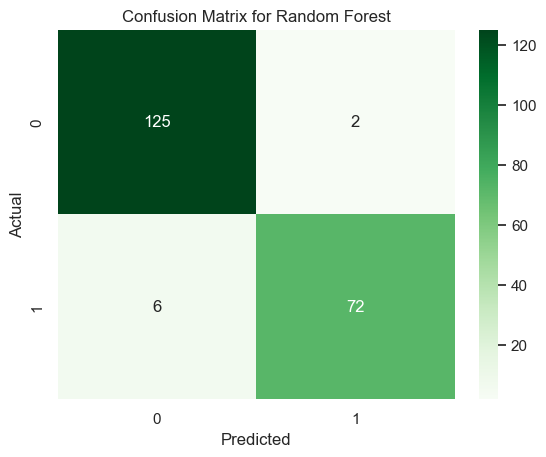

In [62]:
# Plot confusion matrix for random forest
plt.figure()
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# K-Nearest Neighbors (KNN)

In [63]:
# Initialize and train the K-Nearest Neighbors (KNN) classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)

# Make predictions using the KNN model
y_pred_knn = knn_classifier.predict(X_test)

# Print evaluation metrics for KNN
print("\nKNN Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))
print("\nKNN Classification Report:")
print(classification_report(y_test, y_pred_knn))
print("\nKNN Accuracy Score:")
print(accuracy_score(y_test, y_pred_knn))


KNN Confusion Matrix:
[[125   2]
 [  6  72]]

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       127
           1       0.97      0.92      0.95        78

    accuracy                           0.96       205
   macro avg       0.96      0.95      0.96       205
weighted avg       0.96      0.96      0.96       205


KNN Accuracy Score:
0.9609756097560975


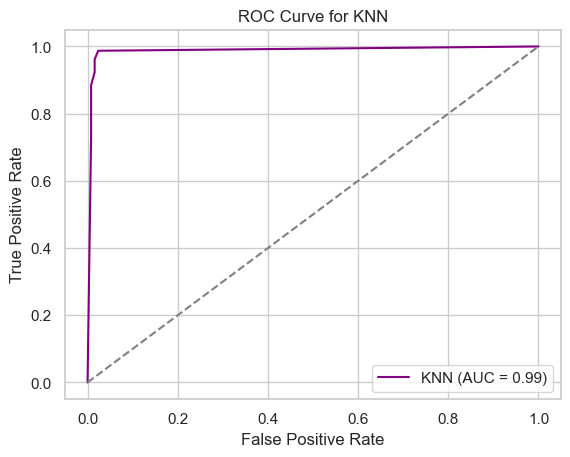

In [64]:
# Plot ROC curve for KNN
knn_probs = knn_classifier.predict_proba(X_test)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_test, knn_probs)
plt.figure()
plt.plot(fpr_knn, tpr_knn, color='purple', label='KNN (AUC = {:.2f})'.format(auc(fpr_knn, tpr_knn)))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN')
plt.legend()
plt.show()

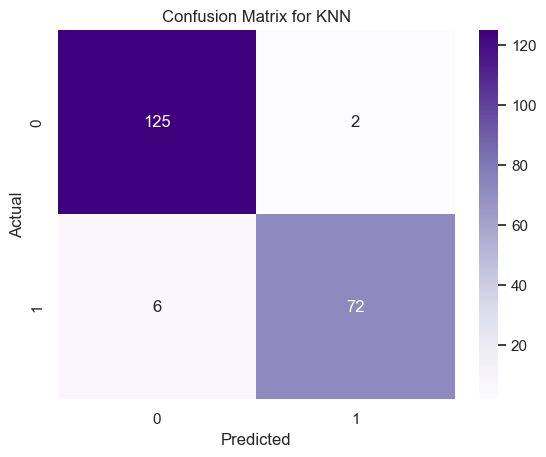

In [65]:
# Plot confusion matrix for KNN
plt.figure()
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Purples')
plt.title('Confusion Matrix for KNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Gradient Boosting

In [66]:
# Initialize and train the Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(random_state=42)
gb_classifier.fit(X_train, y_train)

# Make predictions using the Gradient Boosting model
y_pred_gb = gb_classifier.predict(X_test)

# Print evaluation metrics for Gradient Boosting
print("\nGradient Boosting Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_gb))
print("\nGradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_gb))
print("\nGradient Boosting Accuracy Score:")
print(accuracy_score(y_test, y_pred_gb))


Gradient Boosting Confusion Matrix:
[[124   3]
 [  6  72]]

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       127
           1       0.96      0.92      0.94        78

    accuracy                           0.96       205
   macro avg       0.96      0.95      0.95       205
weighted avg       0.96      0.96      0.96       205


Gradient Boosting Accuracy Score:
0.9560975609756097


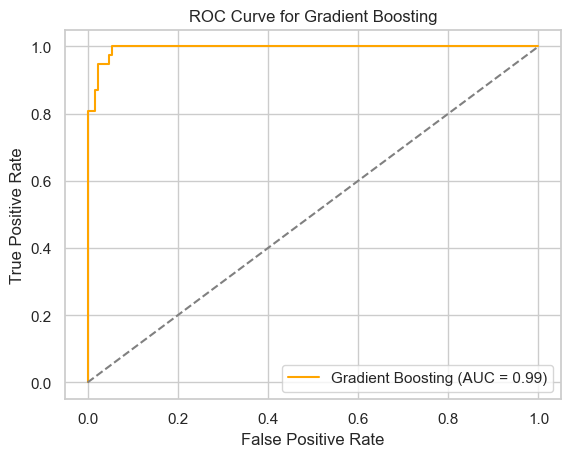

In [67]:
# Plot ROC curve for Gradient Boosting
gb_probs = gb_classifier.predict_proba(X_test)[:, 1]
fpr_gb, tpr_gb, _ = roc_curve(y_test, gb_probs)
plt.figure()
plt.plot(fpr_gb, tpr_gb, color='orange', label='Gradient Boosting (AUC = {:.2f})'.format(auc(fpr_gb, tpr_gb)))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Gradient Boosting')
plt.legend()
plt.show()

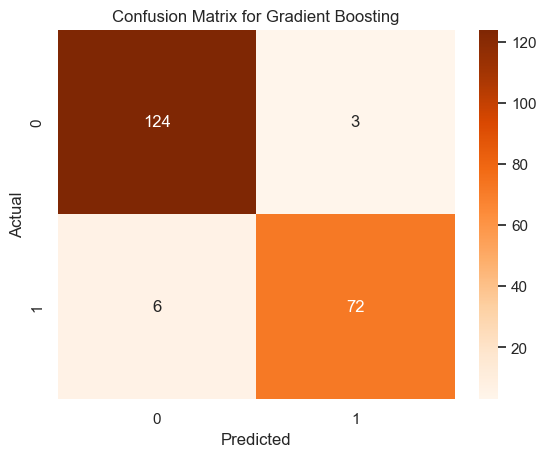

In [68]:
# Plot confusion matrix for Gradient Boosting
plt.figure()
sns.heatmap(confusion_matrix(y_test, y_pred_gb), annot=True, fmt='d', cmap='Oranges')
plt.title('Confusion Matrix for Gradient Boosting')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# SVM
I try a SVM with a linear kernal.

In [69]:
# Initialize and train the SVM classifier
svm_classifier = SVC(kernel='linear', probability=True, random_state=42)
svm_classifier.fit(X_train, y_train)

# Make predictions using the SVM model
y_pred_svm = svm_classifier.predict(X_test)

# Print evaluation metrics for SVM
print("\nSVM Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))
print("\nSVM Classification Report:")
print(classification_report(y_test, y_pred_svm))
print("\nSVM Accuracy Score:")
print(accuracy_score(y_test, y_pred_svm))


SVM Confusion Matrix:
[[125   2]
 [  7  71]]

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       127
           1       0.97      0.91      0.94        78

    accuracy                           0.96       205
   macro avg       0.96      0.95      0.95       205
weighted avg       0.96      0.96      0.96       205


SVM Accuracy Score:
0.9560975609756097


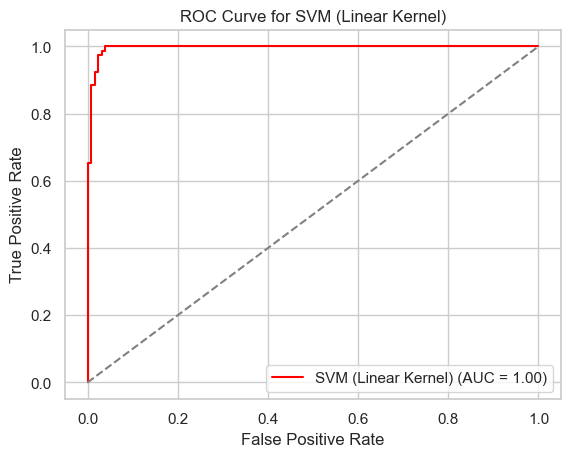

In [70]:
# Plot ROC curve for SVM
svm_probs = svm_classifier.predict_proba(X_test)[:, 1]
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_probs)
plt.figure()
plt.plot(fpr_svm, tpr_svm, color='red', label='SVM (Linear Kernel) (AUC = {:.2f})'.format(auc(fpr_svm, tpr_svm)))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM (Linear Kernel)')
plt.legend()
plt.show()

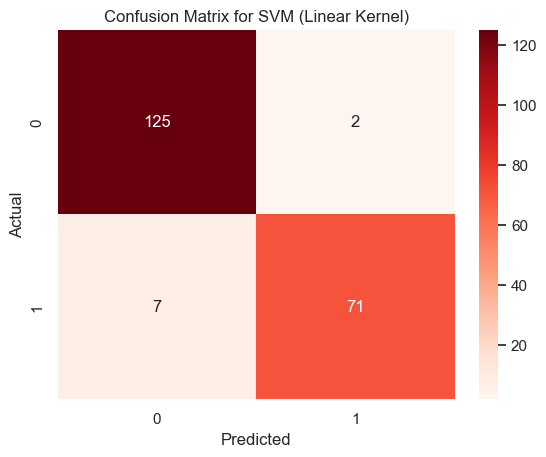

In [71]:
# Plot confusion matrix for SVM
plt.figure()
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix for SVM (Linear Kernel)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

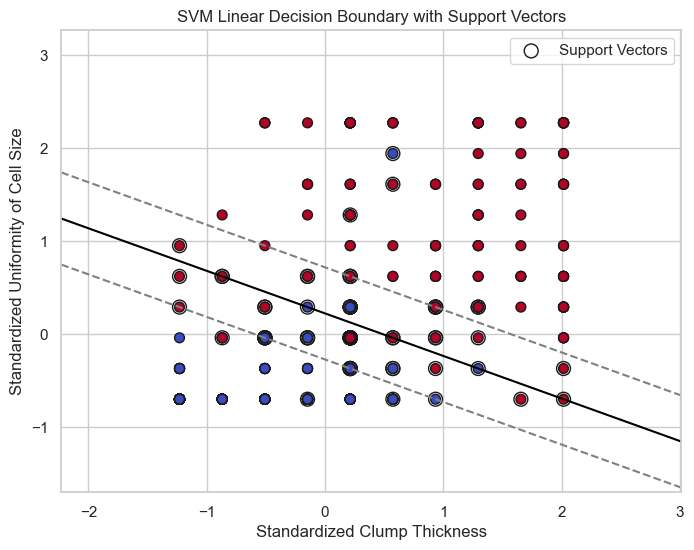

In [72]:
# Select two features for 2D visualization
X = bc_wisconsin_df[['Clump Thickness', 'Uniformity of Cell Size']]
y = bc_wisconsin_df['Class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Standardize the features for better visualization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the SVM model with a linear kernel
svm_model = SVC(kernel='linear', C=1)
svm_model.fit(X_train, y_train)

# Create a mesh grid for plotting decision boundary
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Calculate decision function on the mesh grid
Z = svm_model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and margins
plt.figure(figsize=(8, 6))
plt.contour(xx, yy, Z, levels=[-1, 0, 1], colors=['grey', 'black', 'grey'], linestyles=['--', '-', '--'])

# Plot the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', s=50, edgecolors='k')
plt.scatter(svm_model.support_vectors_[:, 0], svm_model.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k', label='Support Vectors')
plt.xlabel('Standardized Clump Thickness')
plt.ylabel('Standardized Uniformity of Cell Size')
plt.title('SVM Linear Decision Boundary with Support Vectors')
plt.legend()
plt.show()

# Summary of defferent models

For a dataset with complex, non-linear boundaries, such as predicting breast cancer malignancy, ensemble methods like Gradient Boosting and Random Forest tend to achieve higher accuracy than simpler models. These methods effectively capture complex patterns in the data and reduce overfitting.

Ranked Accuracy:
1. Gradient Boosting / Random Forest: Typically provide the highest accuracy due to ensemble learning and ability to capture complex relationships.
2. Support Vector Machine: Often achieves high accuracy, especially with non-linear kernels, but may require significant tuning.
3. K-Nearest Neighbors: Can perform well, but accuracy depends heavily on the choice of k and is less robust to noise.
4. Decision Tree: Can perform decently, but without ensemble techniques, it is prone to overfitting.
5. Logistic Regression: Likely to have the lowest accuracy in this case due to linear boundaries, which may not capture complex patterns.

# Conclusion
1. Model Accuracy: Among the tested models, Random Forest and Gradient Boosting tend to achieve the highest accuracy due to their ability to capture complex, non-linear patterns and their robustness to noise.
2. Important Features: Key features such as Clump Thickness, Uniformity of Cell Size, and Bare Nuclei provide valuable insights for distinguishing benign from malignant cases.

# Practical Application
In a clinical setting, an ensemble model like Random Forest or Gradient Boosting would likely yield the most reliable results for predicting malignancy. These models can help prioritize patients for further diagnostic testing, as higher prediction probabilities of malignancy suggest the need for immediate medical attention.

By understanding and analyzing these key features, healthcare professionals can make more informed decisions, allowing for early intervention and better treatment planning for patients suspected of having breast cancer.